In [3]:
#standartiniai moduliai
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime
from dateutil import parser
import mysql.connector as cnt
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
#import panel as pn
#pn.extension()
import seaborn as sns
import os, sys
import spotipy 
print(os.getcwd())
fontsize=16 #for all entries
titlesize=24
labelsize=16
fwidth=6
fheight=4


/Users/aidaspc/Documents/Python


In [4]:
spoty_db = pd.read_csv('charts.csv')
spoty_db.head(5)

,title,rank,date,artist,url,region,chart,trend,streams
0,Chantaje (feat. Maluma),1,2017-01-01,Shakira,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,Argentina,top200,SAME_POSITION,253019.0
1,Vente Pa' Ca (feat. Maluma),2,2017-01-01,Ricky Martin,https://open.spotify.com/track/7DM4BPaS7uofFul...,Argentina,top200,MOVE_UP,223988.0
2,Reggaetón Lento (Bailemos),3,2017-01-01,CNCO,https://open.spotify.com/track/3AEZUABDXNtecAO...,Argentina,top200,MOVE_DOWN,210943.0
3,Safari,4,2017-01-01,"J Balvin, Pharrell Williams, BIA, Sky",https://open.spotify.com/track/6rQSrBHf7HlZjtc...,Argentina,top200,SAME_POSITION,173865.0
4,Shaky Shaky,5,2017-01-01,Daddy Yankee,https://open.spotify.com/track/58IL315gMSTD37D...,Argentina,top200,MOVE_UP,153956.0


In [5]:
SPOTIPY_CLIENT_ID = '59985300357a4042a1ab0ce901dd756e'
SPOTIPY_CLENT_SECRET = '7c0814f19c004e6d9fddf0a5e4549f82'
SPOTIPY_REDIRECT_URI = 'https://localhost:8888/callback'


birdy_uri = 'spotify:artist:2WX2uTcsvV5OnS0inACecP'
spotify = spotipy.Spotify(client_credentials_manager=SpotifyClientCredentials(client_id=SPOTIPY_CLIENT_ID,client_secret=SPOTIPY_CLENT_SECRET))

# results = spotify.artist_albums(birdy_uri, album_type='album')
# albums = results['items']
# while results['next']:
#     results = spotify.next(results)
#     albums.extend(results['items'])

# for album in albums:
#     print(album['name'])

song_analysis = spotify.audio_features(spoty_db['url'][0])

print(song_analysis)

[{'danceability': 0.852, 'energy': 0.773, 'key': 8, 'loudness': -2.921, 'mode': 0, 'speechiness': 0.0776, 'acousticness': 0.187, 'instrumentalness': 3.05e-05, 'liveness': 0.159, 'valence': 0.907, 'tempo': 102.034, 'type': 'audio_features', 'id': '6mICuAdrwEjh6Y6lroV2Kg', 'uri': 'spotify:track:6mICuAdrwEjh6Y6lroV2Kg', 'track_href': 'https://api.spotify.com/v1/tracks/6mICuAdrwEjh6Y6lroV2Kg', 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/6mICuAdrwEjh6Y6lroV2Kg', 'duration_ms': 195840, 'time_signature': 4}]


In [26]:
#Lt query
test = spoty_db.query('region == "Lithuania" & rank == 1 & streams > 10000')

track_info = []

# print(test)

for i in test.index:
    track_s = spotify.audio_features(test['url'][i])
    track_info.append(track_s[0])

test['info'] = track_info

test.head(10)

/var/folders/rx/1wl4jj2n5cq25tlspqv5v3800000gn/T/ipykernel_67265/2694801046.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['info'] = track_info


,title,rank,date,artist,url,region,chart,trend,streams,info
4274523,bad guy,1,2019-04-01,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,11112.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
4310015,bad guy,1,2019-04-02,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,11017.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
4355904,bad guy,1,2019-04-03,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,11165.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
4415570,bad guy,1,2019-04-04,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,11525.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
4452953,bad guy,1,2019-04-05,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,11127.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
5014941,bad guy,1,2019-04-15,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,10104.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
5096985,bad guy,1,2019-04-16,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,10233.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
5142772,bad guy,1,2019-04-17,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,10633.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
5190521,bad guy,1,2019-04-18,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,10693.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."
5235511,bad guy,1,2019-04-19,Billie Eilish,https://open.spotify.com/track/2Fxmhks0bxGSBdJ...,Lithuania,top200,SAME_POSITION,11518.0,"{'danceability': 0.701, 'energy': 0.425, 'key'..."


In [104]:

print(test['info'].values[10]['energy'])

0.425


/var/folders/rx/1wl4jj2n5cq25tlspqv5v3800000gn/T/ipykernel_67265/688880774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_dainos_lt.dropna(inplace=True)
/var/folders/rx/1wl4jj2n5cq25tlspqv5v3800000gn/T/ipykernel_67265/688880774.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout()


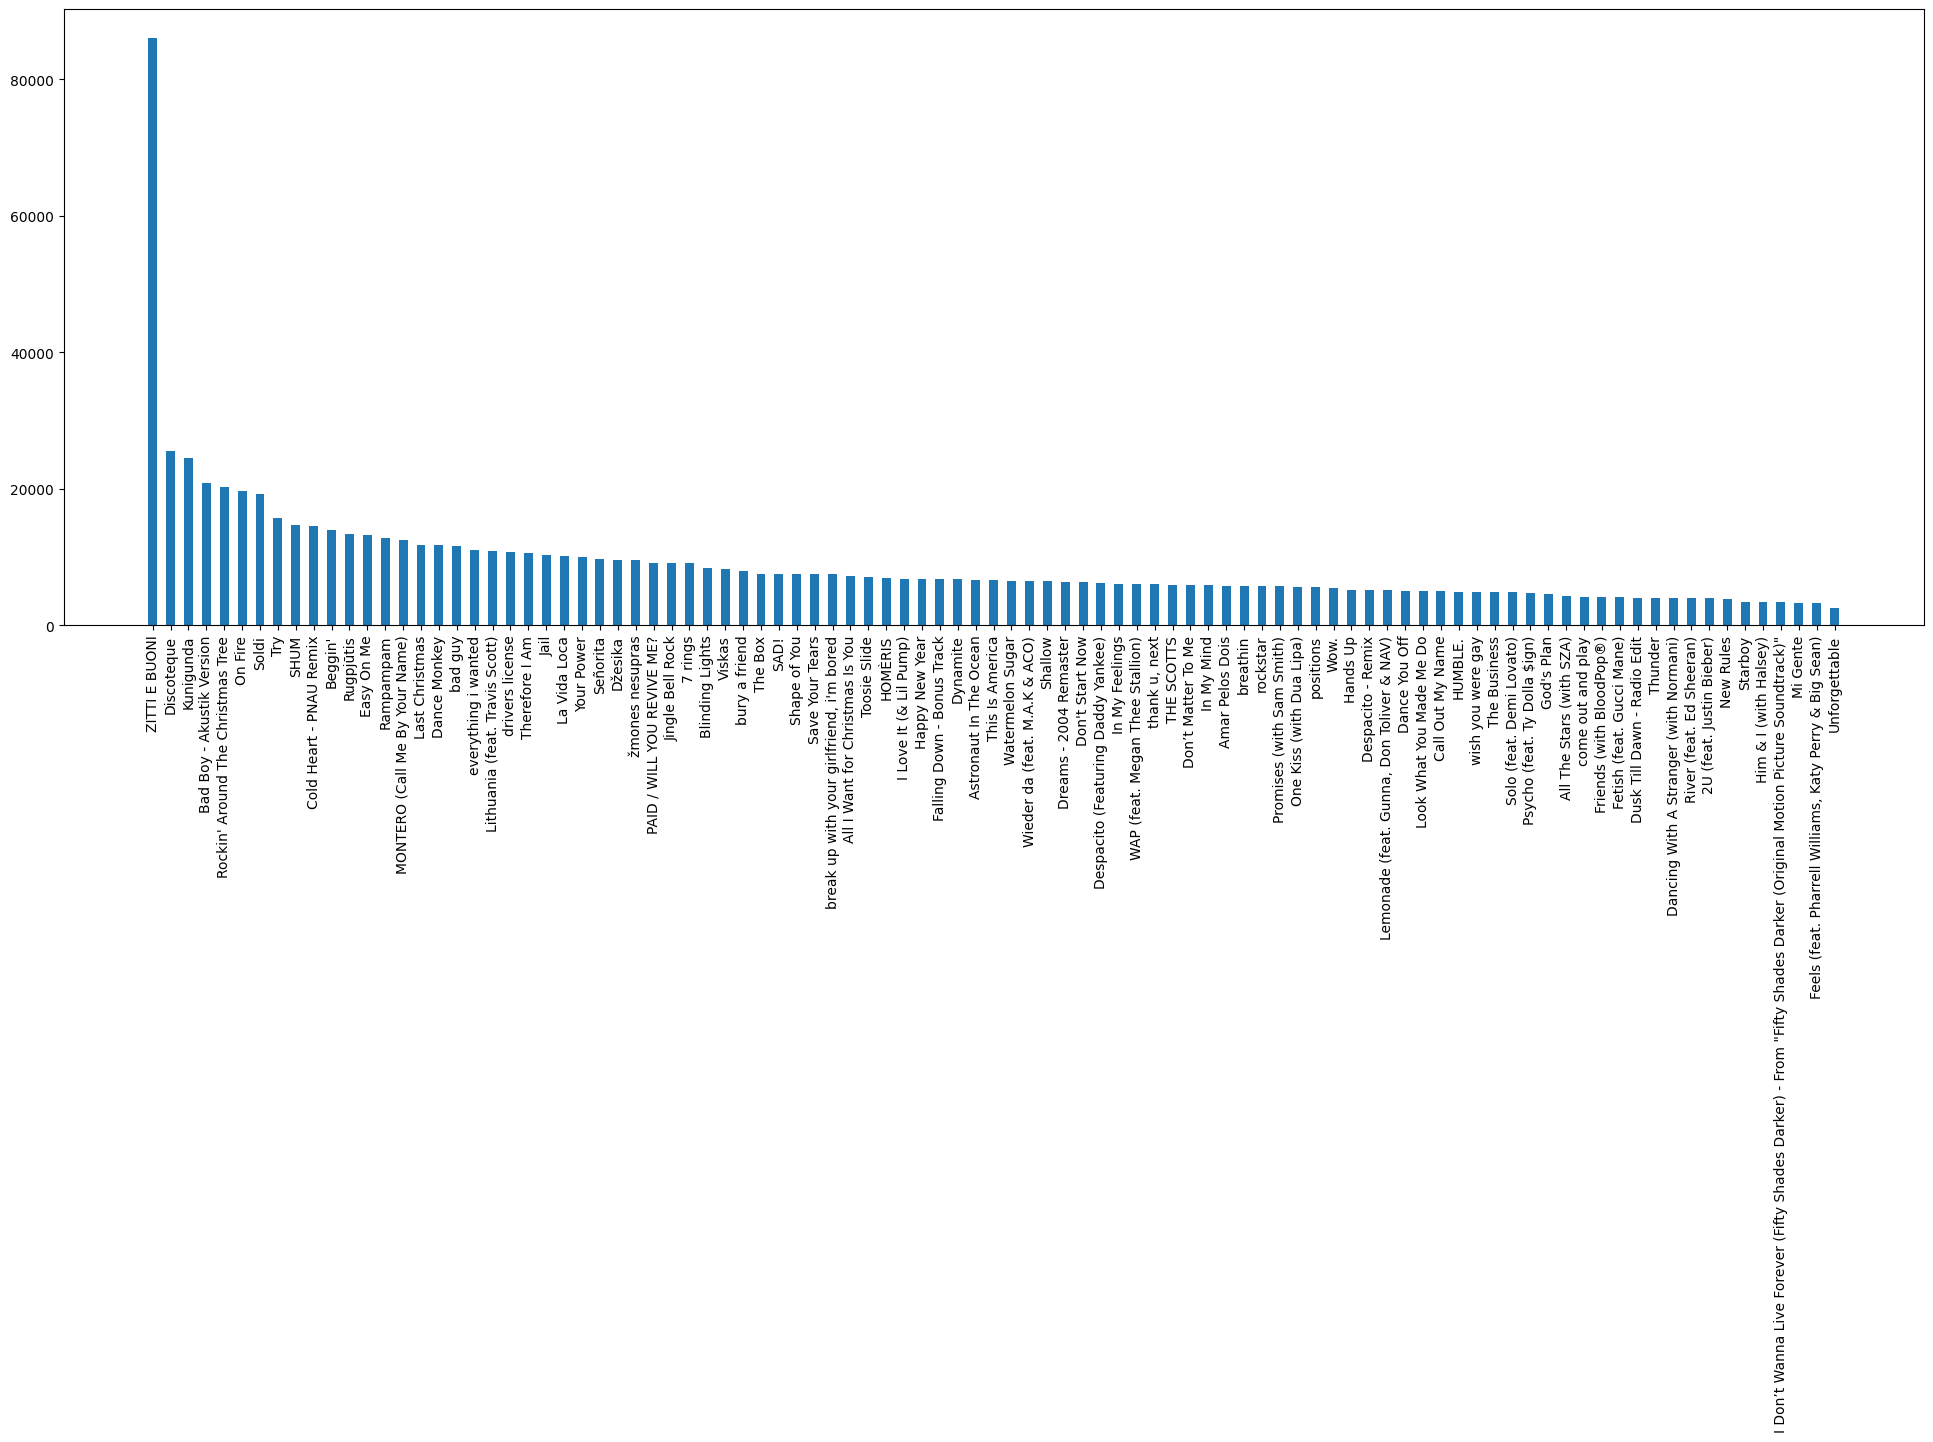

In [27]:
pop_dainos_lt = spoty_db.query('region == "Lithuania" & rank == 1')
pop_dainos_lt.dropna(inplace=True)
unique_pop_lt = pop_dainos_lt.groupby('title', as_index=False)['streams'].max()
unique_pop_lt.sort_values(by=['streams'],inplace=True, ascending=False)

fig, axis = plt.subplots(figsize=(fwidth*4,fheight*2))
#plotting code:
x = np.arange(0, len(unique_pop_lt))
w = 0.5
axis.bar(x,unique_pop_lt['streams'], width=w)

axis.set_xticks(x)
axis.set_xticklabels(unique_pop_lt['title'], rotation = 90,)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

# unique_pop_lt.head(50)

In [28]:

uniquekk = test.groupby('title', as_index=False)['streams'].max()

t_list = []
for i in uniquekk['title']:
    t_list.append(test.query('title == "{}"'.format(i))['info'].values[0])

uniquekk['info'] = t_list

uniquekk.head(100)


,title,streams,info
0,Bad Boy - Akustik Version,20845.0,"{'danceability': 0.625, 'energy': 0.458, 'key'..."
1,Beggin',13944.0,"{'danceability': 0.714, 'energy': 0.8, 'key': ..."
2,Cold Heart - PNAU Remix,14506.0,"{'danceability': 0.796, 'energy': 0.798, 'key'..."
3,Dance Monkey,11719.0,"{'danceability': 0.826, 'energy': 0.593, 'key'..."
4,Discoteque,25570.0,"{'danceability': 0.826, 'energy': 0.799, 'key'..."
5,Easy On Me,13200.0,"{'danceability': 0.604, 'energy': 0.366, 'key'..."
6,Jail,10235.0,"{'danceability': 0.458, 'energy': 0.571, 'key'..."
7,Kunigunda,24498.0,"{'danceability': 0.805, 'energy': 0.797, 'key'..."
8,La Vida Loca,10185.0,"{'danceability': 0.787, 'energy': 0.709, 'key'..."
9,Last Christmas,11785.0,"{'danceability': 0.735, 'energy': 0.478, 'key'..."


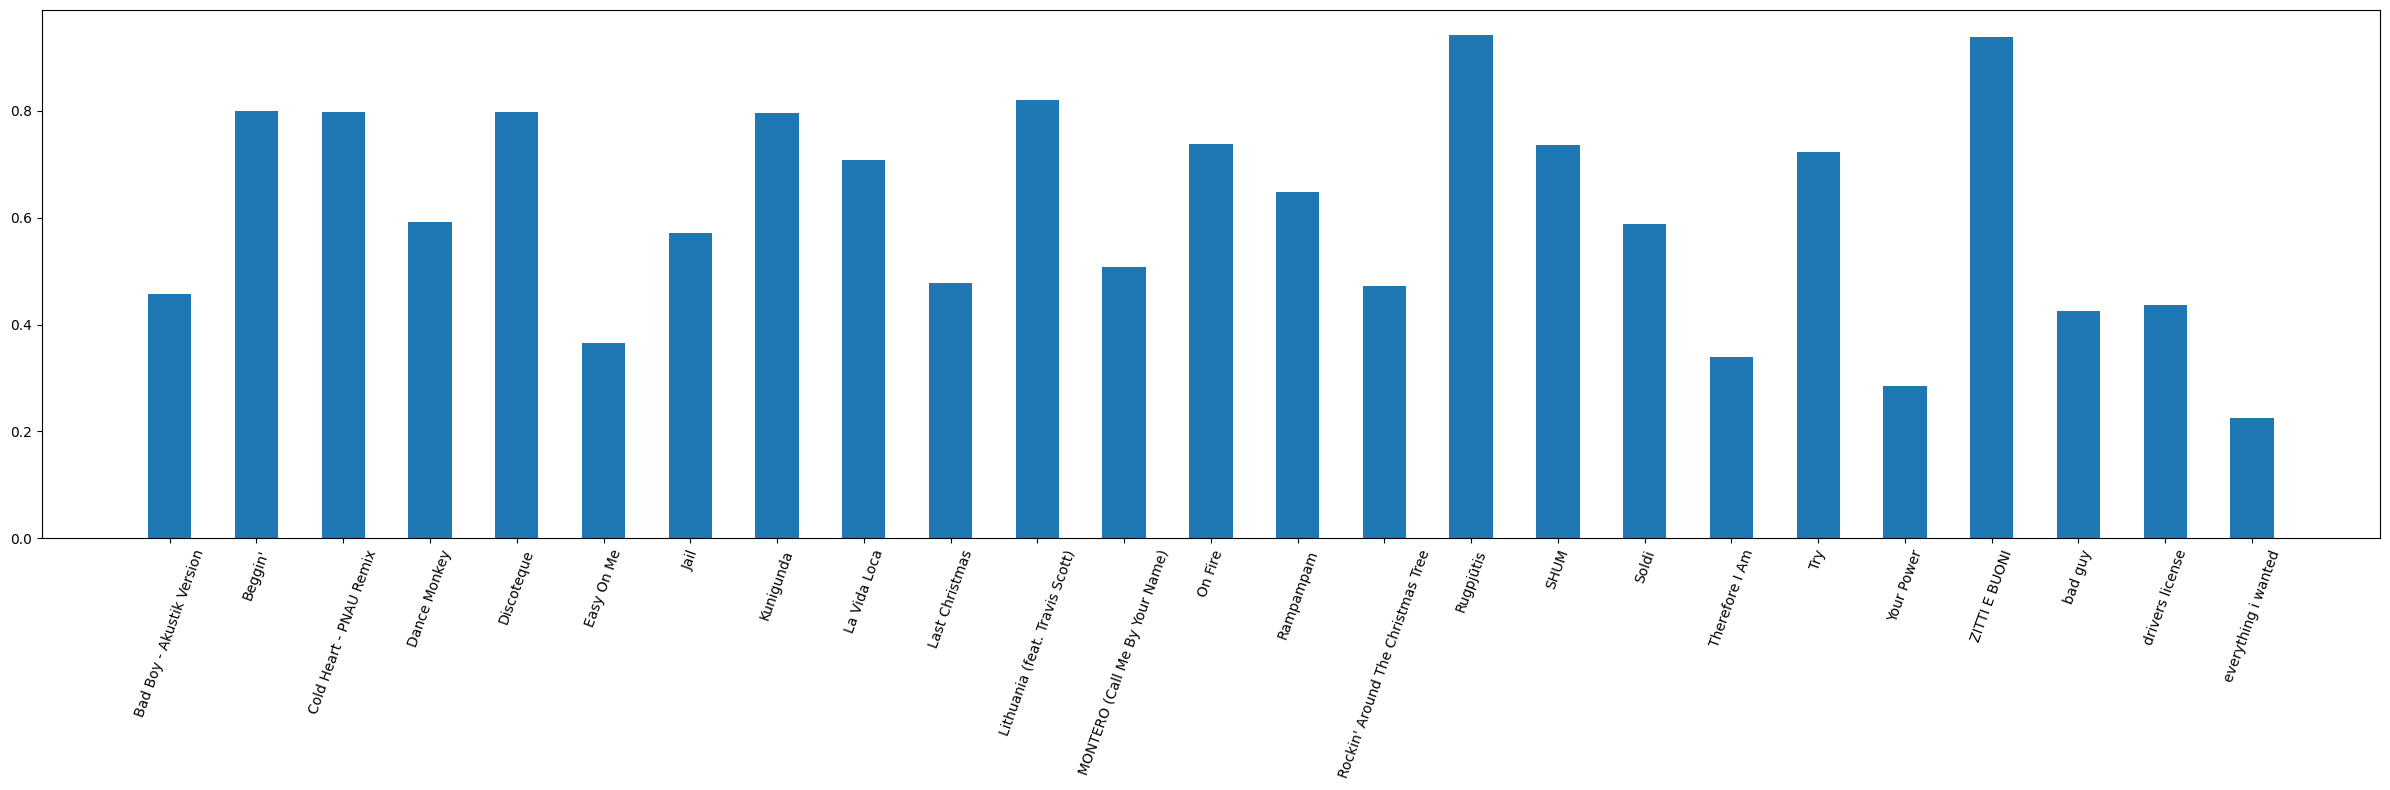

In [29]:
energy = []
liveness = []
valence = []
danceability = []
speechiness = []

for i in uniquekk['info'].values:
    energy.append(i['energy'])
    liveness.append(i['liveness'])
    valence.append(i['valence'])
    danceability.append(i['danceability'])
    speechiness.append(i['speechiness'])

labels = ['energy', 'liveness', 'valence','danceability','speechiness']



fig, axis = plt.subplots(figsize=(fwidth*4,fheight*2))
#plotting code:
x = np.arange(0, len(uniquekk))
w = 0.5
axis.bar(x,energy, width=w)

axis.set_xticks(x)
axis.set_xticklabels(uniquekk['title'], rotation = 70)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

In [ ]:
##kazka prigalvot

# Analysing the relationship between energy and loudness
fig=plt.subplots(figsize=(10,10))
sns.regplot(x='Energy',y='Loudness(dB)',data=df,color='black')

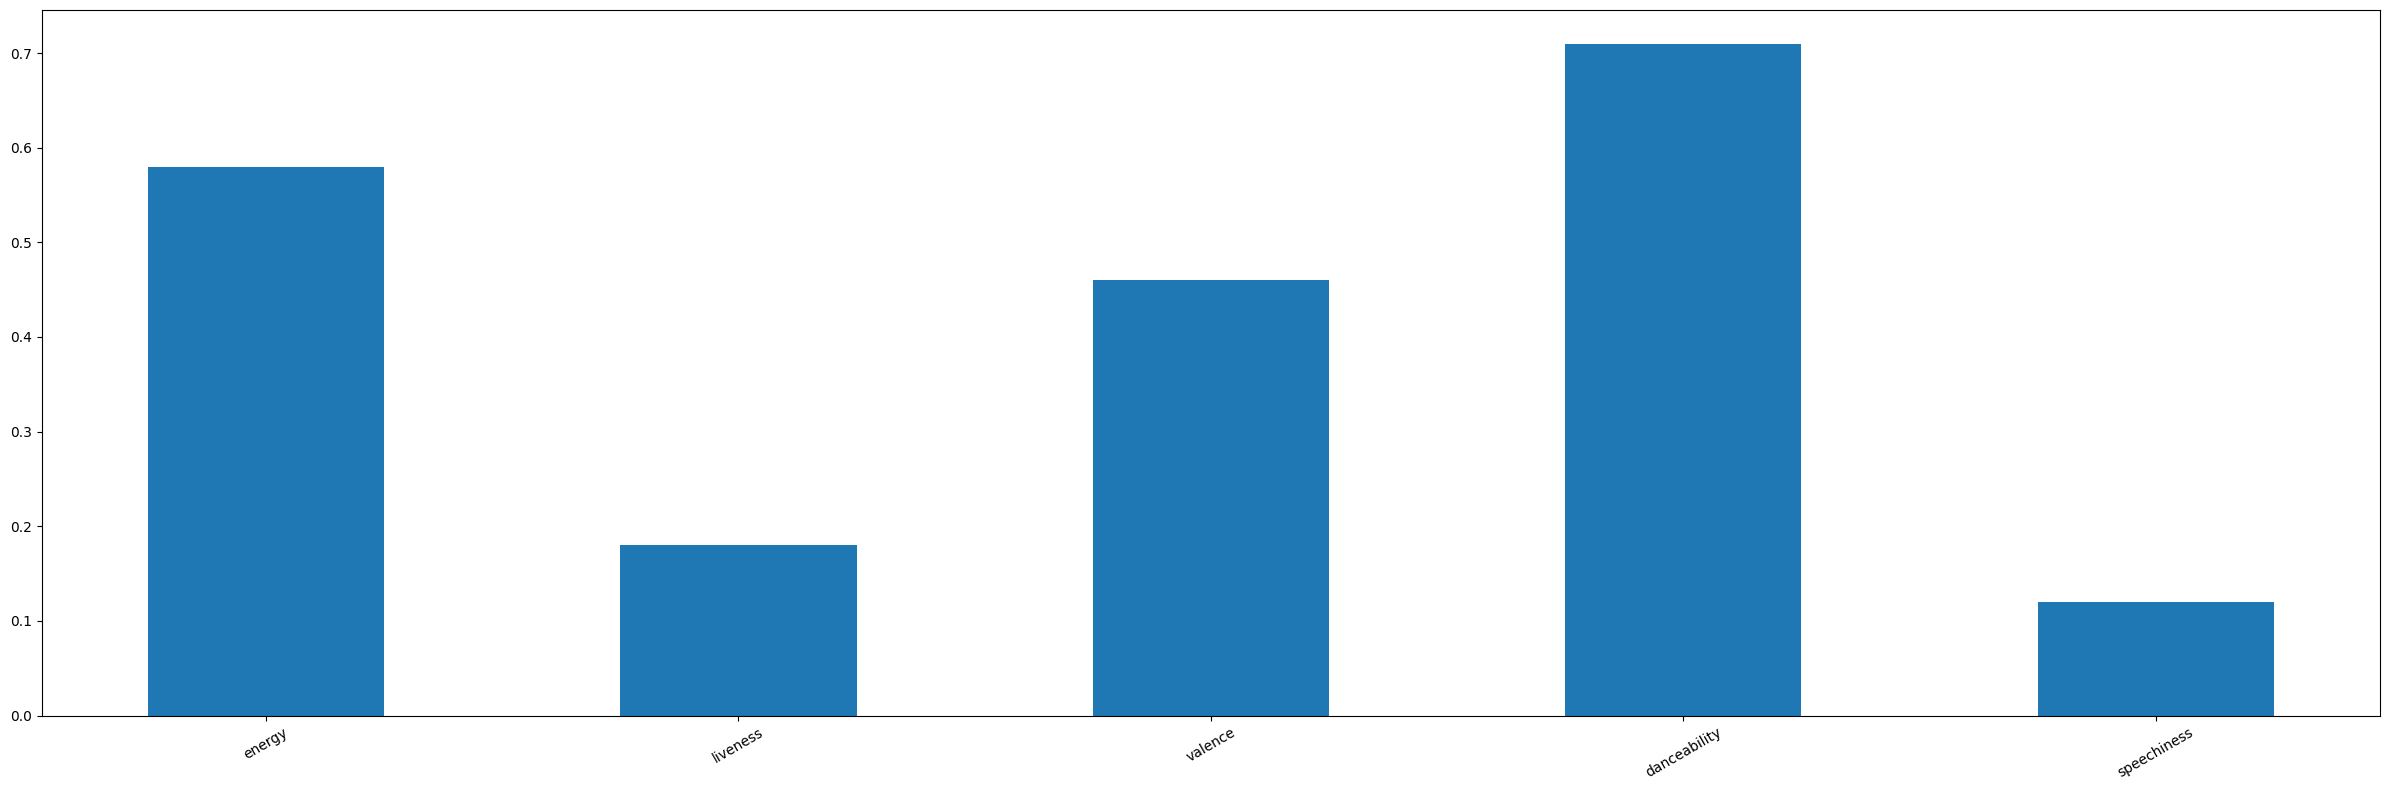

[0.58, 0.18, 0.46, 0.71, 0.12]


In [17]:
def Avg (lst):
    return round(sum(lst)/ len(lst),2)

some_info = [Avg(energy),Avg(liveness),Avg(valence),Avg(danceability),Avg(speechiness)]

fig, axis = plt.subplots(figsize=(fwidth*4,fheight*2))
#plotting code:
x = np.arange(0, len(some_info))
w = 0.5
axis.bar(x,some_info, width=w)

axis.set_xticks(x)
axis.set_xticklabels(labels, rotation = 30)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()
print(some_info)

In [8]:
testG = spoty_db.query('region == "Global" & rank == 1 & streams > 800000')

track_infoG = []

for i in testG.index:
    track_s = spotify.audio_features(testG['url'][i])
    track_infoG.append(track_s[0])

testG['info'] = track_infoG

testG.head(10)

/var/folders/rx/1wl4jj2n5cq25tlspqv5v3800000gn/T/ipykernel_67265/3024257187.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testG['info'] = track_infoG


,title,rank,date,artist,url,region,chart,trend,streams,info
3234,Starboy,1,2017-01-01,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,Global,top200,SAME_POSITION,3135625.0,"{'danceability': 0.681, 'energy': 0.594, 'key'..."
15319,Starboy,1,2017-01-02,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,Global,top200,SAME_POSITION,3342769.0,"{'danceability': 0.681, 'energy': 0.594, 'key'..."
16757,God's Plan,1,2018-03-01,Drake,https://open.spotify.com/track/2XW4DbS6NddZxRP...,Global,top200,SAME_POSITION,7572795.0,"{'danceability': 0.758, 'energy': 0.448, 'key'..."
31862,Shape of You,1,2017-02-01,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Global,top200,SAME_POSITION,7549041.0,"{'danceability': 0.825, 'energy': 0.652, 'key'..."
39310,Starboy,1,2017-01-03,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,Global,top200,SAME_POSITION,3563076.0,"{'danceability': 0.681, 'energy': 0.594, 'key'..."
39325,God's Plan,1,2018-03-02,Drake,https://open.spotify.com/track/2XW4DbS6NddZxRP...,Global,top200,SAME_POSITION,7817732.0,"{'danceability': 0.758, 'energy': 0.448, 'key'..."
53300,Shape of You,1,2017-02-02,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Global,top200,SAME_POSITION,7602214.0,"{'danceability': 0.825, 'energy': 0.652, 'key'..."
82241,Shape of You,1,2017-02-03,Ed Sheeran,https://open.spotify.com/track/7qiZfU4dY1lWllz...,Global,top200,SAME_POSITION,7881255.0,"{'danceability': 0.825, 'energy': 0.652, 'key'..."
83056,Starboy,1,2017-01-04,"The Weeknd, Daft Punk",https://open.spotify.com/track/5aAx2yezTd8zXrk...,Global,top200,SAME_POSITION,3619247.0,"{'danceability': 0.681, 'energy': 0.594, 'key'..."
93033,God's Plan,1,2018-02-01,Drake,https://open.spotify.com/track/2XW4DbS6NddZxRP...,Global,top200,SAME_POSITION,7247715.0,"{'danceability': 0.758, 'energy': 0.448, 'key'..."


In [10]:
uniqueG = testG.groupby('title', as_index=False)['streams'].max()

t_list = []
for i in uniqueG['title']:
    t_list.append(testG.query('title == "{}"'.format(i))['info'].values[0])

uniqueG['info'] = t_list

uniqueG.head(100)

,title,streams,info
0,7 rings,10445538.0,"{'danceability': 0.725, 'energy': 0.321, 'key'..."
1,All I Want for Christmas Is You,17223237.0,"{'danceability': 0.336, 'energy': 0.627, 'key'..."
2,All Mine,4536998.0,"{'danceability': 0.925, 'energy': 0.308, 'key'..."
3,All Too Well (10 Minute Version) (Taylor's Ver...,6673846.0,"{'danceability': 0.631, 'energy': 0.518, 'key'..."
4,Beggin',8005228.0,"{'danceability': 0.714, 'energy': 0.8, 'key': ..."
...,...,...,...
67,my future,5183389.0,"{'danceability': 0.444, 'energy': 0.309, 'key'..."
68,positions,7829519.0,"{'danceability': 0.737, 'energy': 0.802, 'key'..."
69,rockstar,7156650.0,"{'danceability': 0.577, 'energy': 0.522, 'key'..."
70,"thank u, next",9606415.0,"{'danceability': 0.724, 'energy': 0.647, 'key'..."


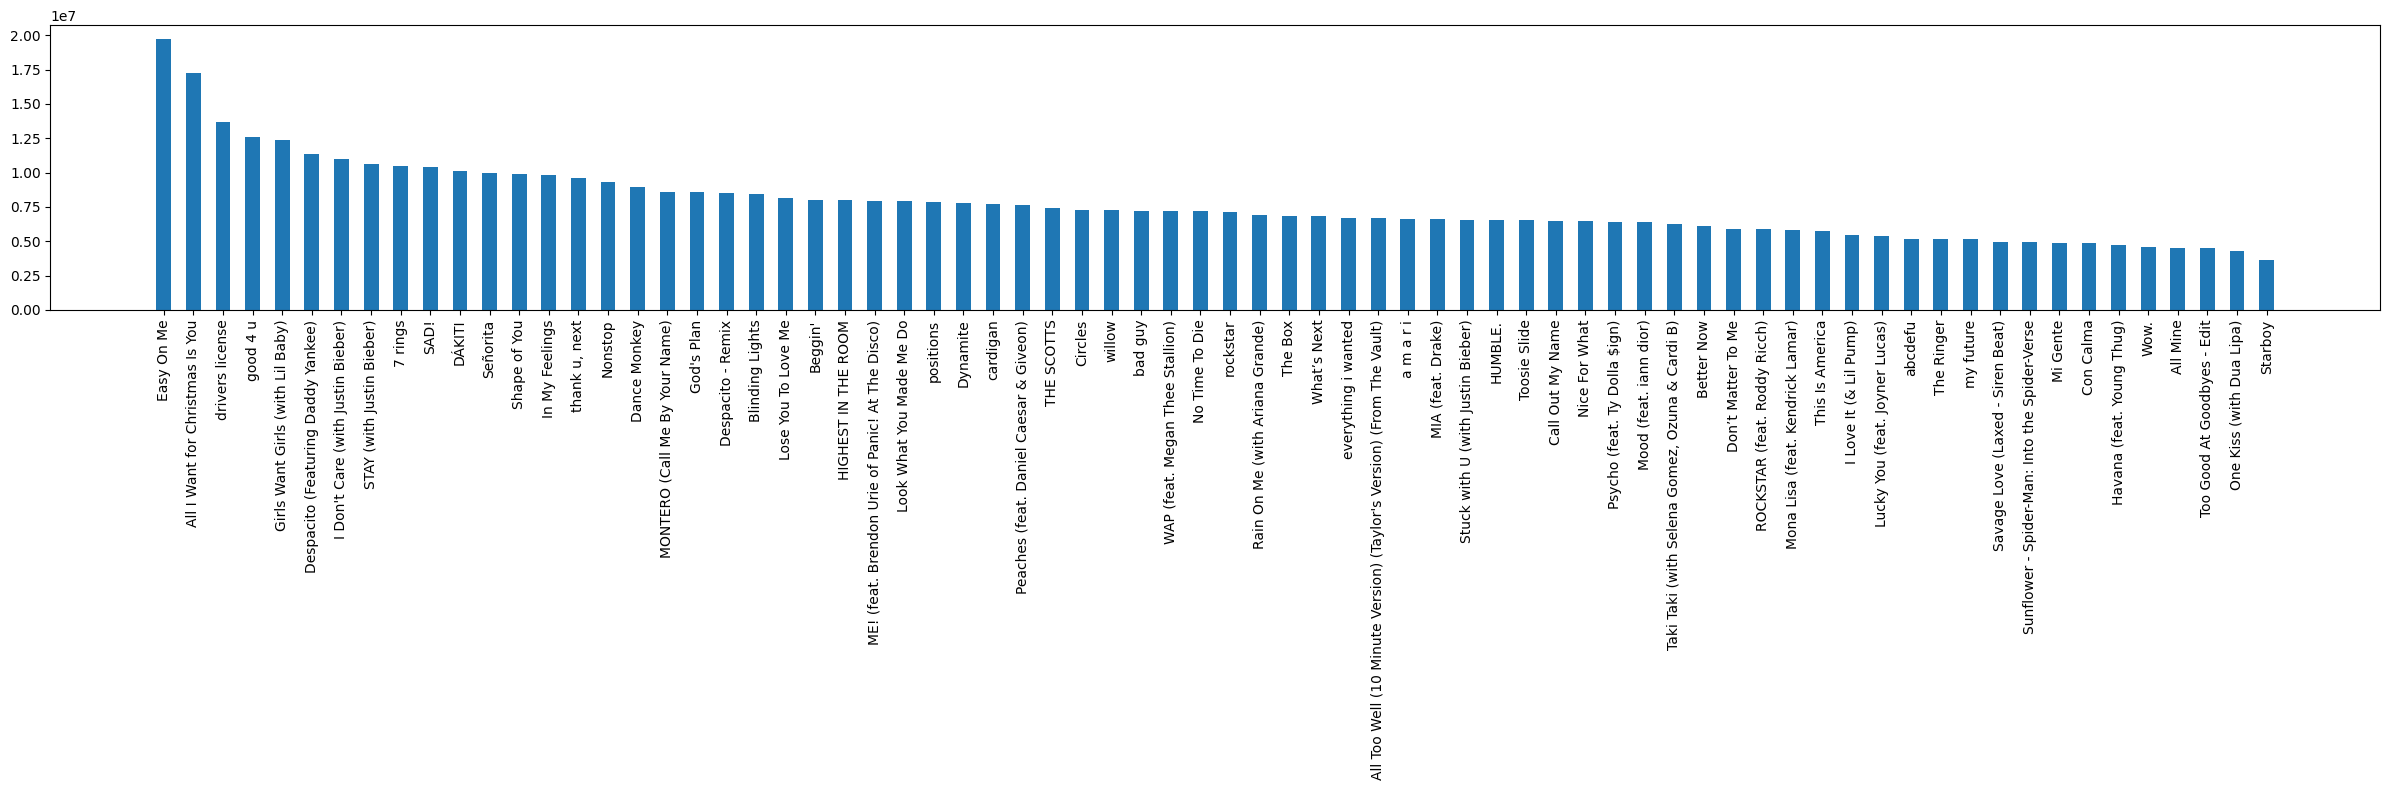

In [12]:
uniqueG.sort_values(by=['streams'],inplace=True, ascending=False)
fig, axis = plt.subplots(figsize=(fwidth*4,fheight*2))
#plotting code:
x = np.arange(0, len(uniqueG))
w = 0.5
axis.bar(x,uniqueG['streams'], width=w)


axis.set_xticks(x)
axis.set_xticklabels(uniqueG['title'], rotation = 90,)
#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()

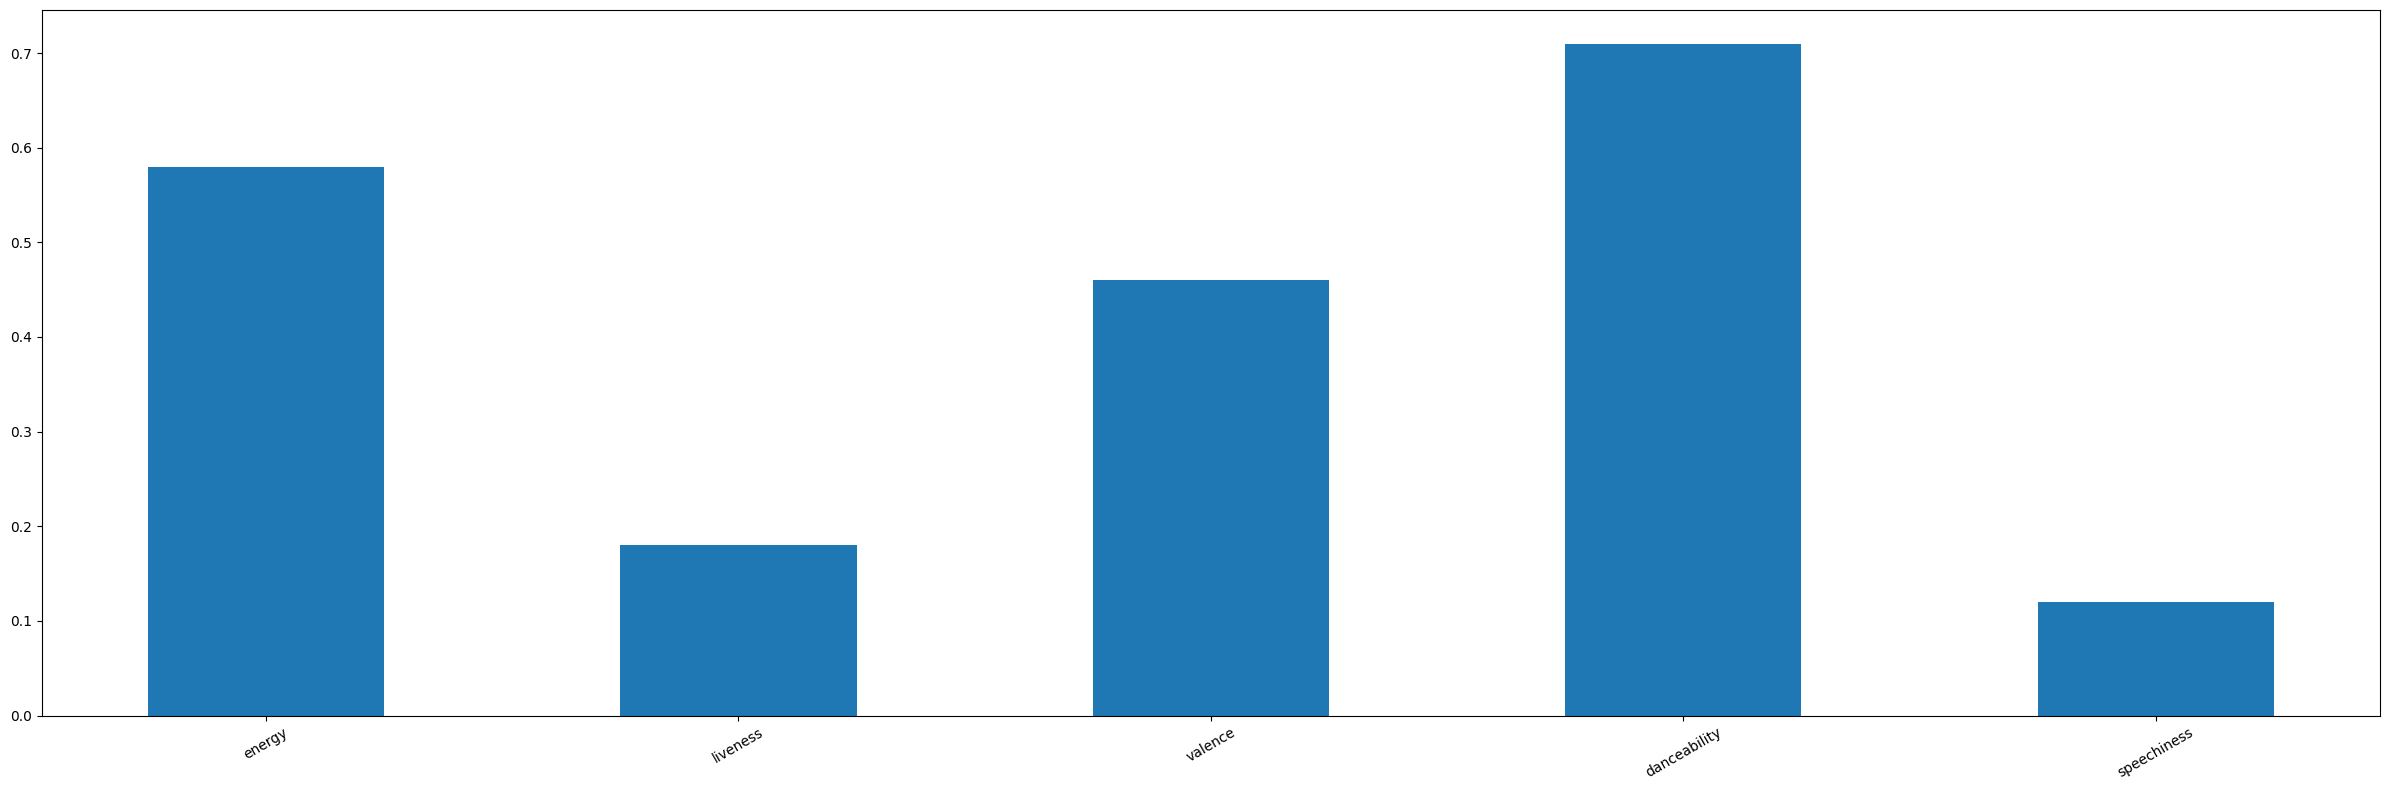

In [18]:
def Avg (lst):
    return round(sum(lst)/ len(lst),2)

energy = []
liveness = []
valence = []
danceability = []
speechiness = []

for i in uniqueG['info'].values:
    energy.append(i['energy'])
    liveness.append(i['liveness'])
    valence.append(i['valence'])
    danceability.append(i['danceability'])
    speechiness.append(i['speechiness'])

labels = ['energy', 'liveness', 'valence','danceability','speechiness']

some_info_G = [Avg(energy),Avg(liveness),Avg(valence),Avg(danceability),Avg(speechiness)]

fig, axis = plt.subplots(figsize=(fwidth*4,fheight*2))
#plotting code:
x = np.arange(0, len(some_info_G))
w = 0.5
axis.bar(x,some_info_G, width=w)

axis.set_xticks(x)
axis.set_xticklabels(labels, rotation = 30)

#axis.legend(loc='best')
#axis.ticklabel_format(style='plain')
fig.tight_layout()
plt.show()


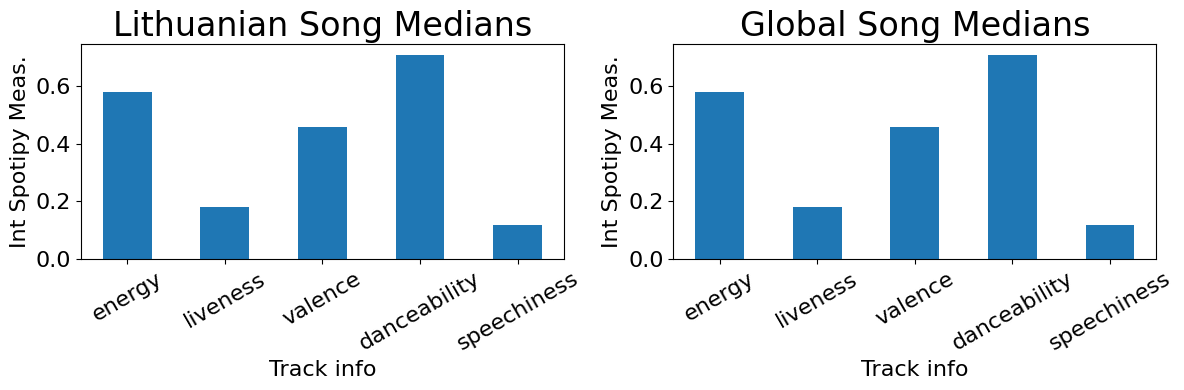

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(fwidth*2,fheight), gridspec_kw={'width_ratios':[1,1]})
#ax1:
#plotting code:

ax1.bar(x,some_info, width=w)
ax1.set_xlabel('Track info', fontsize=fontsize)
ax1.set_ylabel('Int Spotipy Meas.', fontsize=fontsize)
ax1.set_title('Lithuanian Song Medians', fontsize=titlesize)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation = 30)
ax1.tick_params(axis='x', labelsize=labelsize)
ax1.tick_params(axis='y', labelsize=labelsize)
#ax1.legend(loc=1)
#ax2:
#plotting code:

ax2.set_xticks(x)
ax2.bar(x,some_info_G, width=w)
ax2.set_xlabel('Track info', fontsize=fontsize)
ax2.set_ylabel('Int Spotipy Meas.', fontsize=fontsize)
ax2.set_xticklabels(labels, rotation = 30)
ax2.set_title('Global Song Medians', fontsize=titlesize)
ax2.tick_params(axis='x', labelsize=labelsize)
ax2.tick_params(axis='y', labelsize=labelsize)

#ax2.legend(loc=1)
fig.tight_layout()
plt.show()